In [3]:
import os
import csv
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import requests
from scipy.stats import linregress

csvpath = os.path.join('owid-covid-data.csv')

In [4]:
covid = pd.read_csv("owid-covid-data.csv", dtype="object", encoding="utf-8")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [5]:
covid.shape

(59319, 54)

In [6]:
cleancovid= covid[["continent", "location", "date", "total_cases","total_deaths","gdp_per_capita", "hospital_beds_per_thousand", "new_cases", "median_age", "population", "aged_65_older", "aged_70_older","total_tests" ]]
cleancovid

,continent,location,date,total_cases,total_deaths,gdp_per_capita,hospital_beds_per_thousand,new_cases,median_age,population,aged_65_older,aged_70_older,total_tests
0,Asia,Afghanistan,2020-02-24,1.0,NaN,1803.987,0.5,1.0,18.6,38928341.0,2.581,1.337,NaN
1,Asia,Afghanistan,2020-02-25,1.0,NaN,1803.987,0.5,0.0,18.6,38928341.0,2.581,1.337,NaN
2,Asia,Afghanistan,2020-02-26,1.0,NaN,1803.987,0.5,0.0,18.6,38928341.0,2.581,1.337,NaN
3,Asia,Afghanistan,2020-02-27,1.0,NaN,1803.987,0.5,0.0,18.6,38928341.0,2.581,1.337,NaN
4,Asia,Afghanistan,2020-02-28,1.0,NaN,1803.987,0.5,0.0,18.6,38928341.0,2.581,1.337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,Africa,Zimbabwe,2021-01-06,17804.0,431.0,1899.775,1.7,610.0,19.6,14862927.0,2.822,1.882,236530.0
59315,Africa,Zimbabwe,2021-01-07,18675.0,446.0,1899.775,1.7,871.0,19.6,14862927.0,2.822,1.882,NaN
59316,Africa,Zimbabwe,2021-01-08,19660.0,468.0,1899.775,1.7,985.0,19.6,14862927.0,2.822,1.882,NaN
59317,Africa,Zimbabwe,2021-01-09,20499.0,483.0,1899.775,1.7,839.0,19.6,14862927.0,2.822,1.882,NaN


In [7]:
covid.describe

<bound method NDFrame.describe of       iso_code continent     location        date total_cases new_cases  \
0          AFG      Asia  Afghanistan  2020-02-24         1.0       1.0   
1          AFG      Asia  Afghanistan  2020-02-25         1.0       0.0   
2          AFG      Asia  Afghanistan  2020-02-26         1.0       0.0   
3          AFG      Asia  Afghanistan  2020-02-27         1.0       0.0   
4          AFG      Asia  Afghanistan  2020-02-28         1.0       0.0   
...        ...       ...          ...         ...         ...       ...   
59314      ZWE    Africa     Zimbabwe  2021-01-06     17804.0     610.0   
59315      ZWE    Africa     Zimbabwe  2021-01-07     18675.0     871.0   
59316      ZWE    Africa     Zimbabwe  2021-01-08     19660.0     985.0   
59317      ZWE    Africa     Zimbabwe  2021-01-09     20499.0     839.0   
59318      ZWE    Africa     Zimbabwe  2021-01-10     21477.0     978.0   

      new_cases_smoothed total_deaths new_deaths new_deaths_smoot

In [8]:
first = covid.dropna(subset=['continent','total_cases'])

In [9]:
covid['total_deaths'] = covid['total_deaths'].astype(str)
covid['hospital_beds_per_thousand'] = covid['hospital_beds_per_thousand'].astype(str)

ValueError: Illegal format string "hospital_beds_per_thousand"; two marker symbols

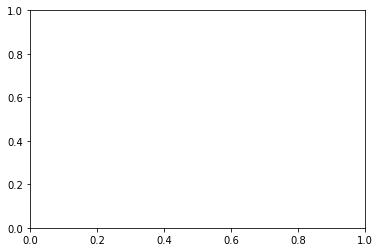

In [10]:
cleancovid = plt.plot('total_deaths','hospital_beds_per_thousand')

In [11]:
#covid['continent'] = covid['continent'].astype(str)
#covid['hospital_beds_per_thousand'] = pd.to_numeric(covid['hospital_beds_per_thousand'],errors='coerce')

ValueError: Unrecognized character e in format string

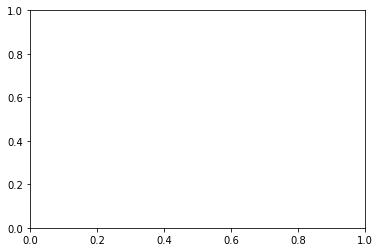

In [12]:
cleancovid = plt.plot('total_deaths','median_age')